Total number of interior nodes: 31064

Smallest computed k² eigenvalues:
Mode 1: k² = 1.032806e+00
Mode 2: k² = 2.112183e+00
Mode 3: k² = 3.120369e+00
Mode 4: k² = 3.666311e+00
Mode 5: k² = 4.672889e+00
Mode 6: k² = 5.699044e+00
Mode 7: k² = 6.465065e+00
Mode 8: k² = 6.640303e+00


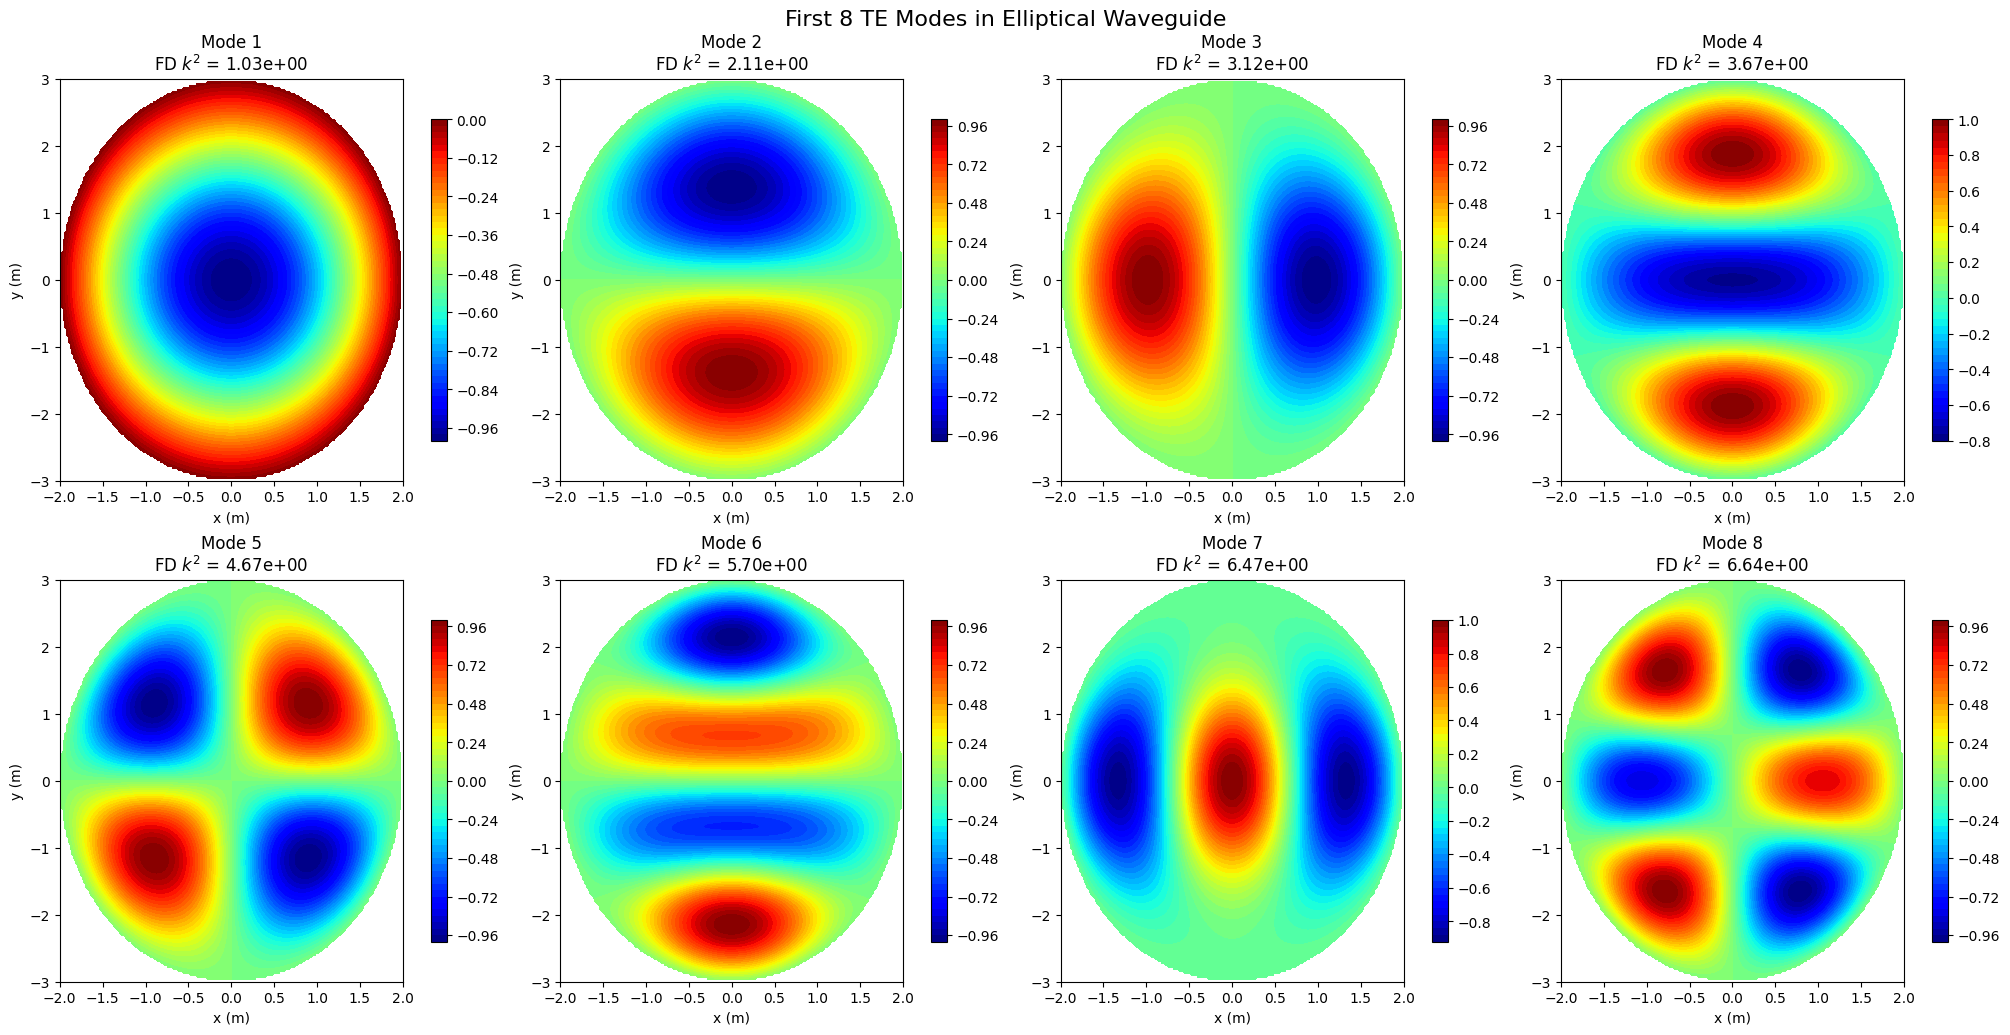

Total number of interior nodes: 70168

Smallest computed k² eigenvalues:
Mode 1: k² = 1.034922e+00
Mode 2: k² = 2.116196e+00
Mode 3: k² = 3.127228e+00
Mode 4: k² = 3.673296e+00
Mode 5: k² = 4.682523e+00
Mode 6: k² = 5.710912e+00
Mode 7: k² = 6.479890e+00
Mode 8: k² = 6.652627e+00


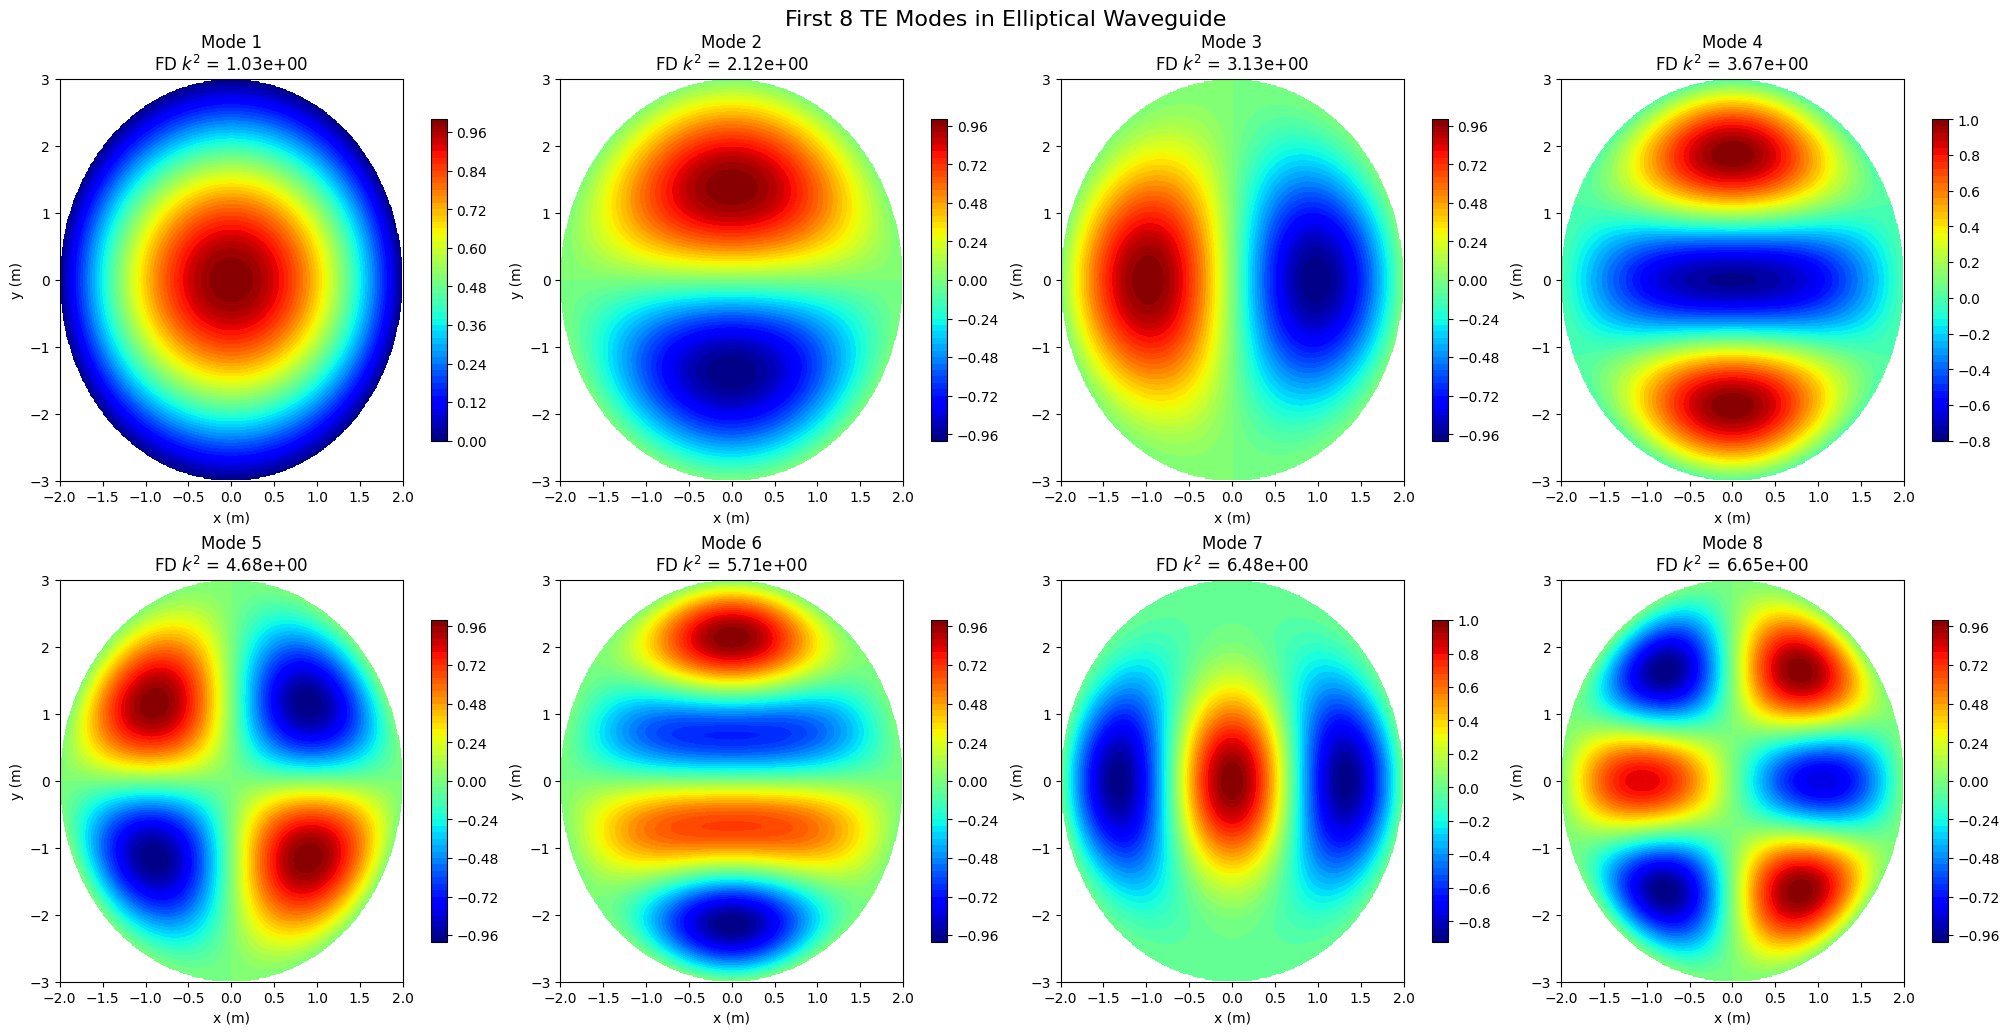

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigsh

def solve_elliptical_fd_modes(rH=2.0, rV=3.0, Nx=200, Ny=200, num_modes=20, plot_modes=8):
    x = np.linspace(-rH, rH, Nx)
    y = np.linspace(-rV, rV, Ny)
    X, Y = np.meshgrid(x, y)

    inside = ((X / rH)**2 + (Y / rV)**2) < 1
    tol = 1e-8
    interior = inside & (((X / rH)**2 + (Y / rV)**2) < 1 - tol)

    # Map grid points to indices
    index_map = {}
    counter = 0
    for j in range(Ny):
        for i in range(Nx):
            if interior[j, i]:
                index_map[(i, j)] = counter
                counter += 1
    M = counter
    print(f"Total number of interior nodes: {M}")

    hx = (2 * rH) / (Nx - 1)
    hy = (2 * rV) / (Ny - 1)

    # Assemble FD matrix
    A = lil_matrix((M, M))
    for j in range(Ny):
        for i in range(Nx):
            if not interior[j, i]:
                continue
            idx = index_map[(i, j)]
            A[idx, idx] = 2.0/hx**2 + 2.0/hy**2
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                ni, nj = i + dx, j + dy
                if (0 <= ni < Nx) and (0 <= nj < Ny) and interior[nj, ni]:
                    idx_n = index_map[(ni, nj)]
                    weight = -1.0/hx**2 if dx else -1.0/hy**2
                    A[idx, idx_n] = weight
    A = A.tocsr()

    # Solve eigenproblem
    eigvals, eigvecs = eigsh(A, k=num_modes, which='SM')
    sorted_indices = np.argsort(eigvals)
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    print("\nSmallest computed k² eigenvalues:")
    for i in range(plot_modes):
        print(f"Mode {i+1}: k² = {eigvals[i]:.6e}")

    # Reconstruct modes on grid
    modes_full = np.zeros((num_modes, Ny, Nx))
    for mode in range(num_modes):
        mode_field = np.zeros((Ny, Nx))
        for (i, j), idx in index_map.items():
            mode_field[j, i] = eigvecs[idx, mode]
        mode_field /= np.max(np.abs(mode_field))  # Normalize
        modes_full[mode] = mode_field

    # Plot
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), constrained_layout=True)
    for i in range(plot_modes):
        ax = axes.flat[i]
        field = np.where(inside, modes_full[i], np.nan)
        cp = ax.contourf(X, Y, field, levels=50, cmap='jet')
        ax.set_title(f"Mode {i+1}\nFD $k^2$ = {eigvals[i]:.2e}")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        fig.colorbar(cp, ax=ax, shrink=0.8)

    plt.suptitle(f"First {plot_modes} TE Modes in Elliptical Waveguide", fontsize=16, y=1.02)
    plt.show()


# 🟢 Example call:
solve_elliptical_fd_modes(Nx=200, Ny=200, rH=2.0, rV=3.0)
solve_elliptical_fd_modes(Nx=300, Ny=300, rH=2.0, rV=3.0)

Total number of interior nodes: 31064

Smallest computed k² eigenvalues:
Mode 1: k² = 6.385742e-01
Mode 2: k² = 1.621078e+00
Mode 3: k² = 1.621078e+00
Mode 4: k² = 2.911724e+00
Mode 5: k² = 2.912035e+00
Mode 6: k² = 3.364081e+00
Mode 7: k² = 4.493770e+00
Mode 8: k² = 4.493770e+00


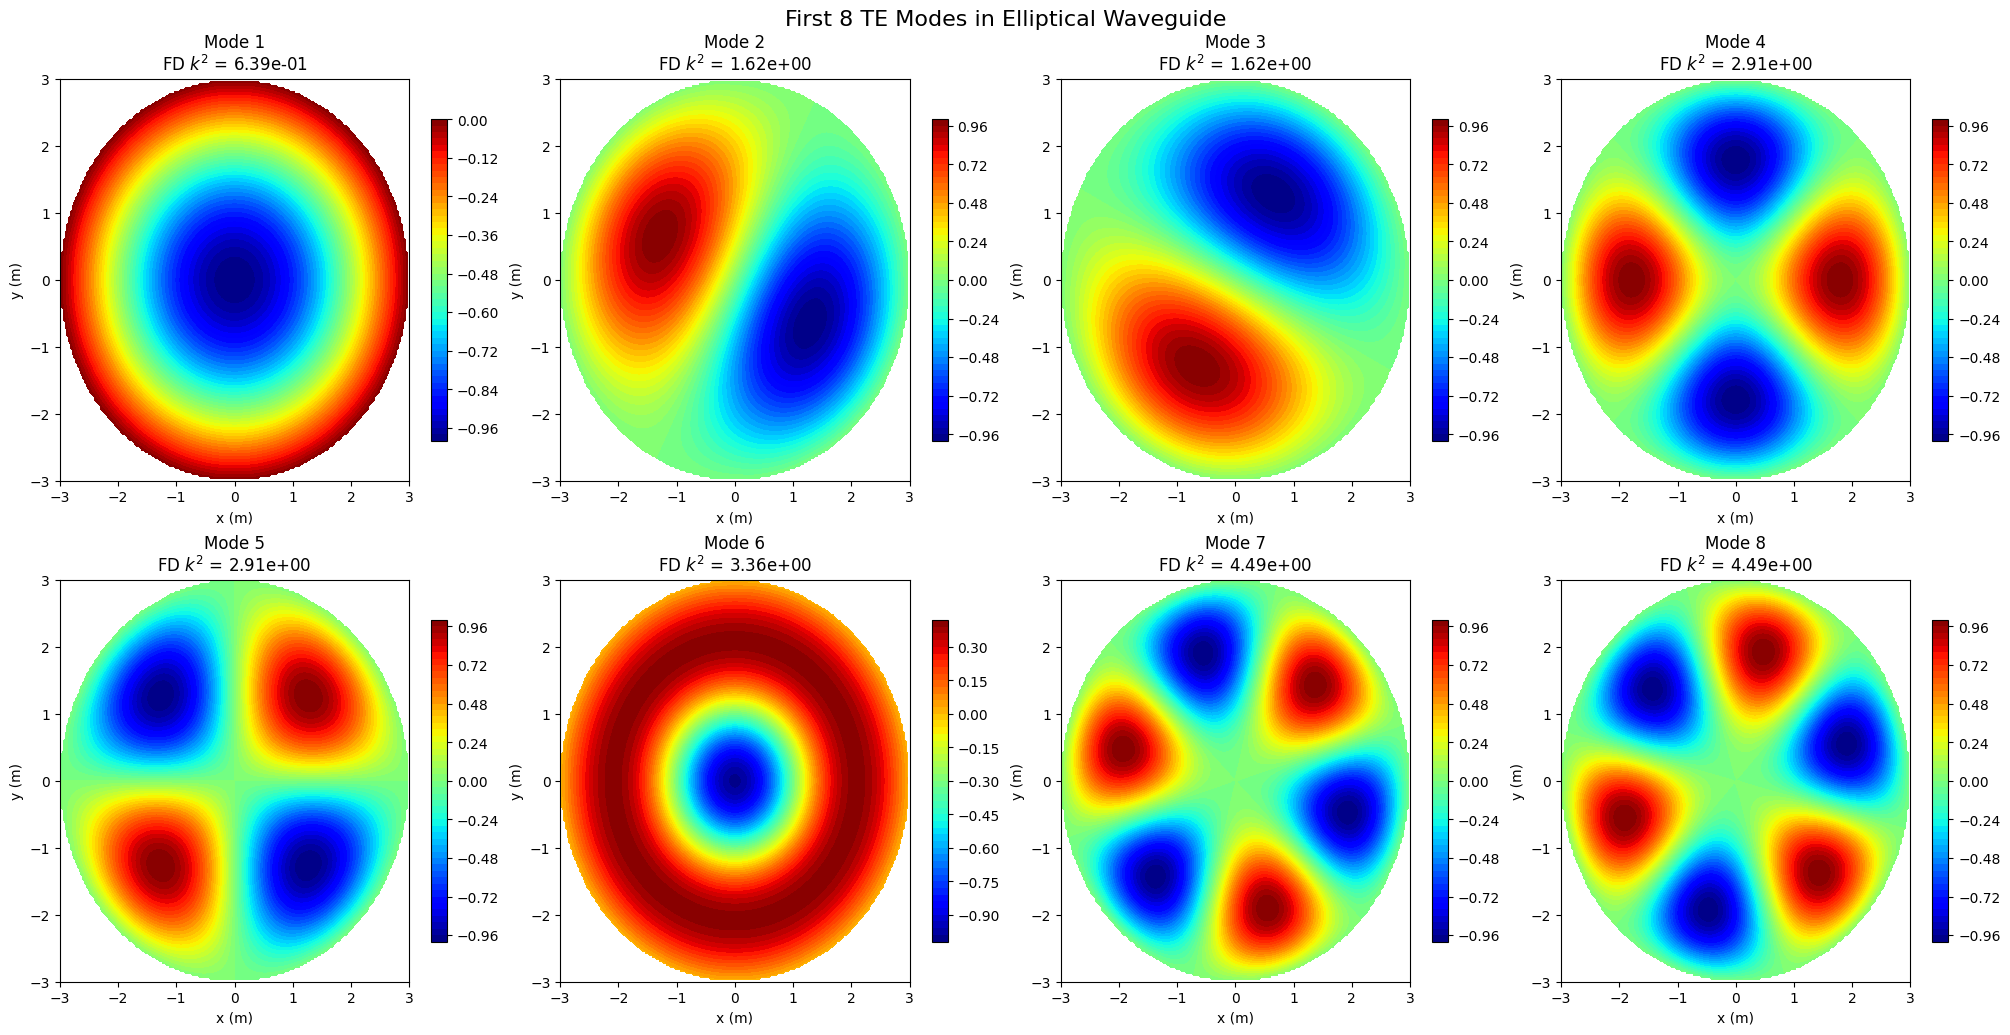

Total number of interior nodes: 70168

Smallest computed k² eigenvalues:
Mode 1: k² = 6.398329e-01
Mode 2: k² = 1.624325e+00
Mode 3: k² = 1.624325e+00
Mode 4: k² = 2.917605e+00
Mode 5: k² = 2.918061e+00
Mode 6: k² = 3.371007e+00
Mode 7: k² = 4.503188e+00
Mode 8: k² = 4.503188e+00


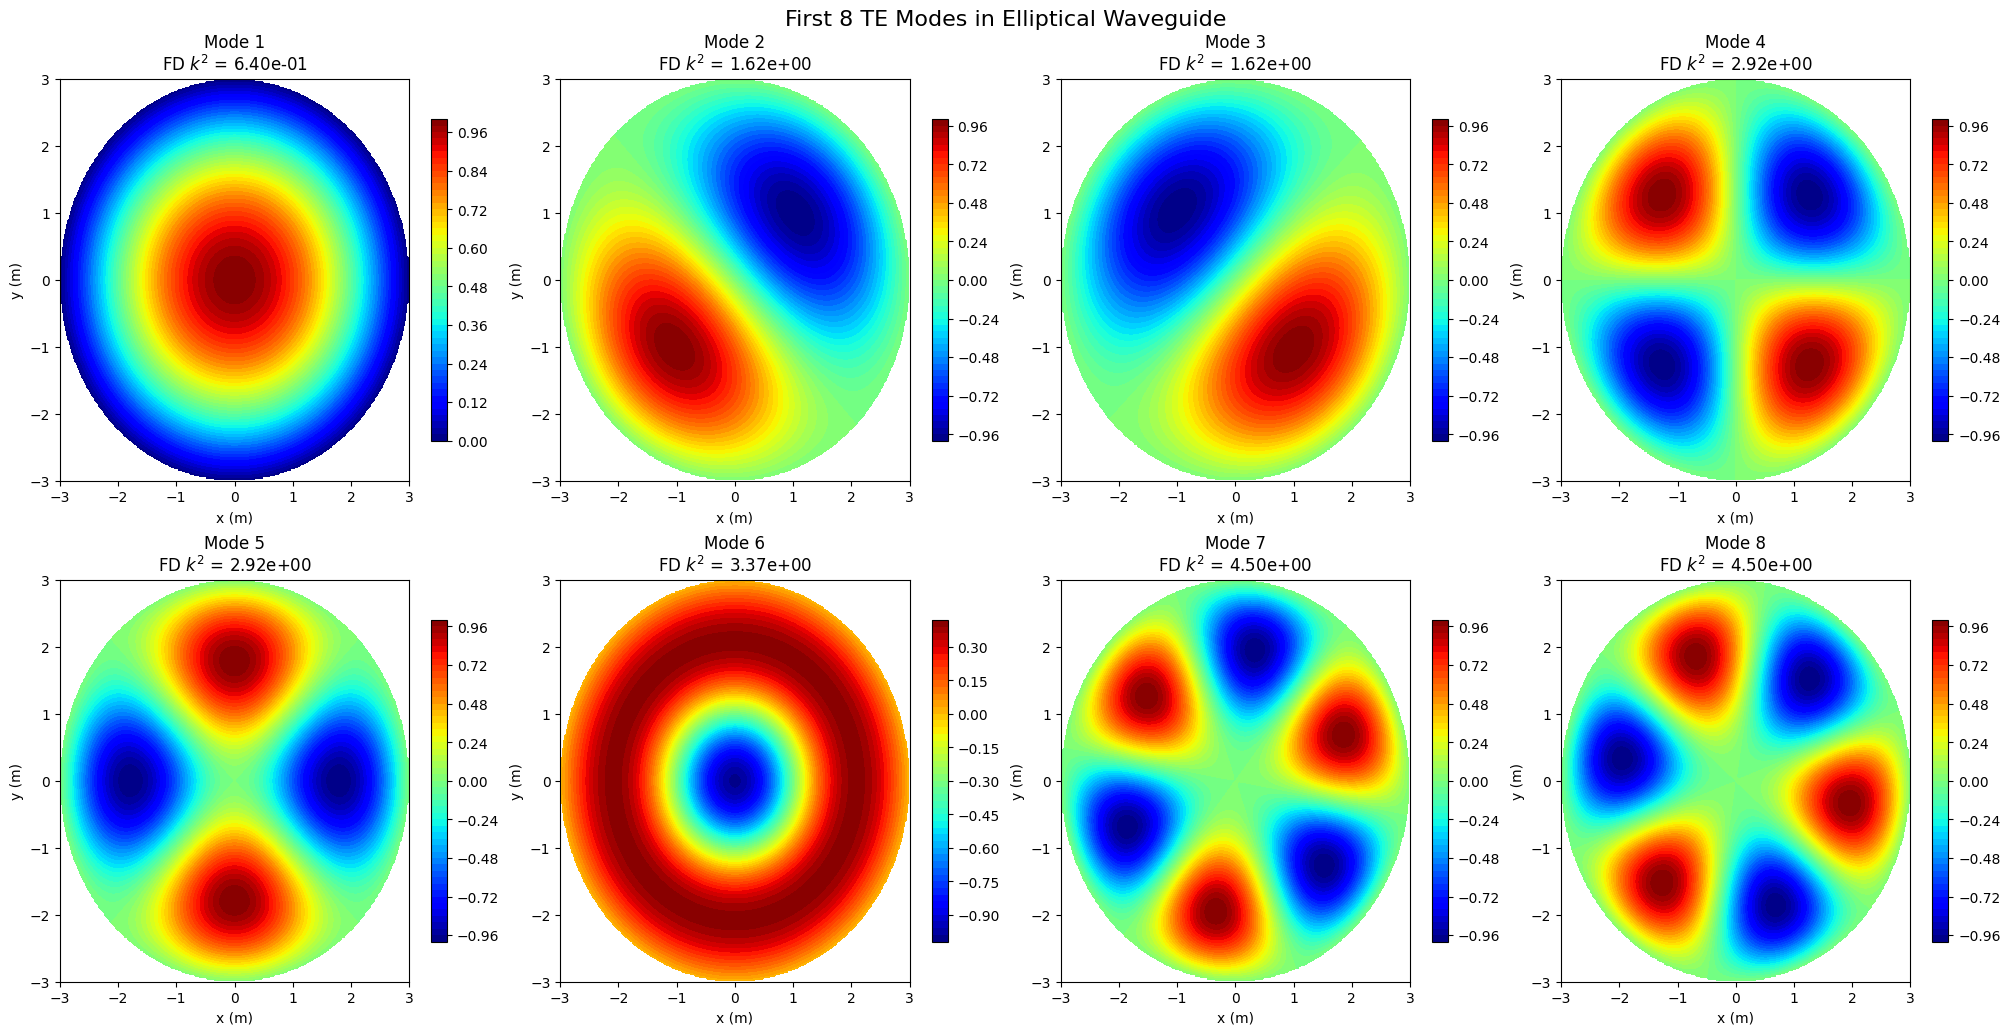

In [7]:
#Circular Waveguide
solve_elliptical_fd_modes(Nx=200, Ny=200, rH=3.0, rV=3.0)
solve_elliptical_fd_modes(Nx=300, Ny=300, rH=3.0, rV=3.0)